## 資料處理

In [37]:
import numpy as np
import pandas as pd
import collections
import datetime
import matplotlib.pyplot as plt
import talib

plt.rcParams['figure.figsize'] = (24, 12)

# 讀取資料

In [38]:
市值 = pd.read_csv("TEJ_調整後股價資料//市值(百萬元).csv") #TEJ_調整後股價資料 (剛剛TEJ_資料整理 整理的資料夾)
市值['年月日'] = pd.to_datetime(市值['年月日'])
市值 = 市值.set_index('年月日')

In [39]:
收盤價 = pd.read_csv("TEJ_調整後股價資料//收盤價(元).csv")
收盤價['年月日'] = pd.to_datetime(收盤價['年月日'])
收盤價 = 收盤價.set_index('年月日')

In [40]:
市場別 = pd.read_csv("TEJ_調整後股價資料//市場別.csv", low_memory=False)
市場別['年月日'] = pd.to_datetime(市場別['年月日'])
市場別 = 市場別.set_index('年月日')
#市場別 = 市場別.apply(lambda x: x.str.strip()) # x.str.strip()把一個字串前後的空白都拿掉

In [41]:
市場別.head()

,50,51,1101,1102,1103,1104,1107,1108,1109,1110,...,911613,911616,911619,911622,911626,911868,912000,912398,913889,916665
年月日,,,,,,,,,,,,,,,,,,,,,
2005-01-03,TSE,NaN,TSE,TSE,TSE,TSE,TSE,TSE,TSE,TSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,TSE,NaN,TSE,TSE,TSE,TSE,TSE,TSE,TSE,TSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,TSE,NaN,TSE,TSE,TSE,TSE,TSE,TSE,TSE,TSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,TSE,NaN,TSE,TSE,TSE,TSE,TSE,TSE,TSE,TSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,TSE,NaN,TSE,TSE,TSE,TSE,TSE,TSE,TSE,TSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
市場別.iloc[0][0]
#'TSE'字串後面還有一串空白(需要刪除)

'TSE  '

In [43]:
市場別 = 市場別.apply(lambda x: x.str.strip()) # x.str.strip()把一個字串前後的空白都拿掉
市場別.iloc[0][0] #'TSE'字串後面一串空白被拿掉了

'TSE'

In [44]:
董監持股 = pd.read_csv("TEJ_董監_經理人持股//董監持股%.csv")
董監持股['年月日'] = pd.to_datetime(董監持股['年月日'])
董監持股 = 董監持股.set_index('年月日')
#董監持股.columns = 董監持股.columns.str.strip() #用strip()把column後面的空白拿掉
#董監持股 = 董監持股.shift(1).dropna(how = "all", axis = 0) #更改成確定會知道持股數值的日期，因為是下一個月才知道，往後shift(把1/1的值到2/1)，並把第一個row drop掉
#董監持股.index = 董監持股.index + datetime.timedelta(14) #把index加上14天(因為下個月15號慈才會公布)

In [45]:
董監持股.columns #可以看到columns後面多了一些空白

Index(['000116 ', '000930 ', '000960 ', '0009A0 ', '1101   ', '1102   ',
       '1103   ', '1104   ', '1107   ', '1108   ',
       ...
       '9944   ', '9945   ', '9946   ', '9949   ', '9950   ', '9951   ',
       '9955   ', '9958   ', '9960   ', '9962   '],
      dtype='object', length=2085)

In [46]:
董監持股.columns = 董監持股.columns.str.strip() 
董監持股.columns

Index(['000116', '000930', '000960', '0009A0', '1101', '1102', '1103', '1104',
       '1107', '1108',
       ...
       '9944', '9945', '9946', '9949', '9950', '9951', '9955', '9958', '9960',
       '9962'],
      dtype='object', length=2085)

In [47]:
董監持股.head()

,000116,000930,000960,0009A0,1101,1102,1103,1104,1107,1108,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
年月日,,,,,,,,,,,,,,,,,,,,,
2005-01-01,100.0,100.0,100.0,100.0,7.66,33.06,25.72,11.25,5.0,13.66,...,32.69,37.64,20.80,22.39,41.38,34.51,53.20,31.57,28.93,26.70
2005-02-01,100.0,100.0,100.0,100.0,7.66,33.06,25.70,11.27,5.0,14.29,...,32.69,37.64,20.80,22.39,41.38,34.45,53.20,31.57,28.93,18.86
2005-03-01,100.0,100.0,100.0,100.0,7.69,33.06,25.69,11.29,5.0,14.29,...,32.56,37.64,20.80,22.39,41.38,34.45,52.62,31.57,28.93,18.86
2005-04-01,100.0,100.0,100.0,100.0,7.95,33.06,25.69,11.29,5.0,14.29,...,32.56,37.64,18.70,22.39,41.38,34.68,52.62,31.57,28.93,18.86
2005-05-01,100.0,100.0,100.0,100.0,8.06,33.06,25.69,11.29,5.0,14.29,...,31.79,37.64,18.87,22.39,41.38,34.68,52.62,31.57,28.93,18.86


In [48]:
董監持股 = 董監持股.shift(1).dropna(how = "all", axis = 0) #數據是前一個月的
董監持股.head()

,000116,000930,000960,0009A0,1101,1102,1103,1104,1107,1108,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
年月日,,,,,,,,,,,,,,,,,,,,,
2005-02-01,100.0,100.0,100.0,100.0,7.66,33.06,25.72,11.25,5.0,13.66,...,32.69,37.64,20.80,22.39,41.38,34.51,53.20,31.57,28.93,26.70
2005-03-01,100.0,100.0,100.0,100.0,7.66,33.06,25.70,11.27,5.0,14.29,...,32.69,37.64,20.80,22.39,41.38,34.45,53.20,31.57,28.93,18.86
2005-04-01,100.0,100.0,100.0,100.0,7.69,33.06,25.69,11.29,5.0,14.29,...,32.56,37.64,20.80,22.39,41.38,34.45,52.62,31.57,28.93,18.86
2005-05-01,100.0,100.0,100.0,100.0,7.95,33.06,25.69,11.29,5.0,14.29,...,32.56,37.64,18.70,22.39,41.38,34.68,52.62,31.57,28.93,18.86
2005-06-01,100.0,100.0,100.0,100.0,8.06,33.06,25.69,11.29,5.0,14.29,...,31.79,37.64,18.87,22.39,41.38,34.68,52.62,31.57,28.93,18.86


In [49]:
董監持股.index = 董監持股.index + datetime.timedelta(14) # 每月15日公布
董監持股.head()

,000116,000930,000960,0009A0,1101,1102,1103,1104,1107,1108,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
年月日,,,,,,,,,,,,,,,,,,,,,
2005-02-15,100.0,100.0,100.0,100.0,7.66,33.06,25.72,11.25,5.0,13.66,...,32.69,37.64,20.80,22.39,41.38,34.51,53.20,31.57,28.93,26.70
2005-03-15,100.0,100.0,100.0,100.0,7.66,33.06,25.70,11.27,5.0,14.29,...,32.69,37.64,20.80,22.39,41.38,34.45,53.20,31.57,28.93,18.86
2005-04-15,100.0,100.0,100.0,100.0,7.69,33.06,25.69,11.29,5.0,14.29,...,32.56,37.64,20.80,22.39,41.38,34.45,52.62,31.57,28.93,18.86
2005-05-15,100.0,100.0,100.0,100.0,7.95,33.06,25.69,11.29,5.0,14.29,...,32.56,37.64,18.70,22.39,41.38,34.68,52.62,31.57,28.93,18.86
2005-06-15,100.0,100.0,100.0,100.0,8.06,33.06,25.69,11.29,5.0,14.29,...,31.79,37.64,18.87,22.39,41.38,34.68,52.62,31.57,28.93,18.86


In [50]:
# 不會用到
最高價 = pd.read_csv("TEJ_調整後股價資料//最高價(元).csv")
最高價['年月日'] = pd.to_datetime(最高價['年月日'])
最高價 = 最高價.set_index('年月日')

In [51]:
# 不會用到
最低價 = pd.read_csv("TEJ_調整後股價資料//最低價(元).csv")
最低價['年月日'] = pd.to_datetime(最低價['年月日'])
最低價 = 最低價.set_index('年月日')

In [52]:
# 不會用到
董監質押股 = pd.read_csv("TEJ_董監_經理人持股//董監質押股%.csv")
董監質押股['年月日'] = pd.to_datetime(董監質押股['年月日'])
董監質押股 = 董監質押股.set_index('年月日')
董監質押股.columns = 董監質押股.columns.str.strip()
董監質押股 = 董監質押股.shift(1).dropna(how = "all", axis = 0)
董監質押股.index = 董監質押股.index + datetime.timedelta(14)

In [53]:
# 不會用到
經理人持股 = pd.read_csv("TEJ_董監_經理人持股//經理人持股%.csv")
經理人持股['年月日'] = pd.to_datetime(經理人持股['年月日'])
經理人持股 = 經理人持股.set_index('年月日')
經理人持股.columns = 經理人持股.columns.str.strip()
經理人持股 = 經理人持股.shift(1).dropna(how = "all", axis = 0)
經理人持股.index = 經理人持股.index + datetime.timedelta(14)

In [54]:
# 不會用到
ADX = 收盤價.copy()
for c in 收盤價.columns:
    ADX[c] = talib.ADX(最高價[c].dropna(), 最低價[c].dropna(), 收盤價[c].dropna(), 20)

# 預設選股日期
### 定在每個月的16號(15號一定會知道董監事持股)

In [55]:
選股日期 = pd.date_range("2007-01-01", "2021-04-01", freq = "MS") + datetime.timedelta(15) #起始2007-2021 多久一次:MS(Month的第一天)，再加15天
選股前一日 = 選股日期 - datetime.timedelta(1)
選股後一日 = 選股日期 + datetime.timedelta(1)
回測最後一日 = pd.to_datetime("2021-05-15") #4/16加一個月

# 邏輯磚塊

In [56]:
class Condition:
    def __init__(self, data, condition_type, threshold): #condition_type, threshold 條件的種類和門檻
        self.data = data
        self.condition_type = condition_type
        self.threshold = threshold
        
        #每檔股票的門檻值都一樣 or 每檔股票的門檻都不一樣
        if type(threshold) == pd.Series: 
            valid_tickers = list(set(self.data.index) & set(self.threshold.index)) #資料和門檻值都共同有的ticker，把他們共有的tickers拿出來
            self.data = self.data[valid_tickers] #只保留他們倆個都有tickers的資料 和門檻值
            self.threshold = self.threshold[valid_tickers] 
            
    #輸入條件後，要能找出滿足這個條件的股票代號有哪些        
    def build(self, used_tickers = None): #used_tickers:我們要使用的股票代碼(如果使用者沒說要用在哪個股票上，None代表可以用的股票是資料中有的股票代碼)
        if used_tickers is None:
            valid_tickers = list(self.data.index) #等於data裡面有的股票代碼
        else: #如果它有指定要從哪些股票中篩選，必須要是資料裡有的和符合used_tickers(必須兩個都有)
            valid_tickers = list(set(self.data.index) & set(used_tickers))
            
        #根據不同的condition type做處理:一種有排序、一種是跟門檻值比較的(不排序)
        if "rank" in self.condition_type:
            if self.condition_type == "rank_high_pct": # ascending = False:我原本數值比較高的，它的排名比較前面 # pct = True:回傳百分比%(pr值)
                rank_data = self.data[valid_tickers].rank(ascending = False, pct = True, na_option='bottom') 

            elif self.condition_type == "rank_low_pct": # ascending = True我原本數值比較低的，排名比較前面(第一名是比較差的)
                rank_data = self.data[valid_tickers].rank(ascending = True, pct = True, na_option='bottom')

            elif self.condition_type == "rank_high":# pct = False:回傳名次
                rank_data = self.data[valid_tickers].rank(ascending = False, pct = False, na_option='bottom') # pct = False: 回傳真實的排名

            elif self.condition_type == "rank_low":
                rank_data = self.data[valid_tickers].rank(ascending = True, pct = False, na_option='bottom')
                # rank_data是排名後的data
                
            result = self.data[valid_tickers][rank_data < self.threshold] #可以用的資料中，找排名小於我們門檻值的
        
        else: #純粹跟門檻值比較的
            if self.condition_type == "compare_high":
                result = self.data[valid_tickers][self.data > self.threshold] #大於門檻值

            elif self.condition_type == "compare_low":
                result = self.data[valid_tickers][self.data < self.threshold] #小於門檻值

            elif self.condition_type == "equal":
                result = self.data[valid_tickers][self.data == self.threshold]
            
        return list(result.index) #回傳結果(哪些tickers滿足這些條件)
    

In [57]:
class ConditionAnd: #把兩個條件結合起來變成一個新的條件
    def __init__(self, conditions):
        self.conditions = conditions #把傳進來的conditions的list(裡面包含很多condition)回傳給自己
    
    def build(self, used_tickers = None):
        tickers = None
        for condition in self.conditions: #把每個condition run一遍
            result  = condition.build(used_tickers) #取得符合這個condition的tickers，再把這些tickers做交集的邏輯運算，得到新的可以的tickers
            
            if tickers is None:
                tickers = result
            else:
                tickers = list(set(tickers) & set(result))  #做condition的交集
                
        return tickers
    
class ConditionOR: #把兩個條件or起來變成一個新的條件
    def __init__(self, conditions):
        self.conditions = conditions
    
    def build(self, used_tickers = None):
        tickers = None
        for condition in self.conditions:
            result  = condition.build(used_tickers)
            
            if tickers is None:
                tickers = result
            else:
                tickers = list(set(tickers) | set(result)) #做condition的聯集
                
        return tickers

In [58]:
#不同層級的條件合成(上下集合的關係)

class ConditionBlocks:
    def __init__(self):
        self.condition_blocks = []  #初始是一個空的list
        
    def add_condition(self, condition):
        self.condition_blocks.append(condition)
        
    def build(self):
        tickers = None
        for condition in self.condition_blocks:
            if tickers is None:
                tickers = condition.build() #拿到tickers
            else:
                tickers = condition.build(tickers) #前面條件篩選過後的再篩選
                
        return tickers

# 回測

### 上市股票市值前5%，董監事持股增加(同個層級)

In [60]:
N = 2
K = 10 #均線長度
fee = 1.425/1000 * 0.6 #手續費
tax = 3/1000 #交易稅
retrun_series = pd.Series([1], [選股日期[0]]) #儲存回測結果
tickers_record = [] #儲存選到的股票

for i in range(len(選股日期)):
    日期 = 選股日期[i]
    #print(日期)
    
    # 準備資料
    當期市場別 = 市場別.loc[:日期].iloc[-1].dropna() # loc[:日期].iloc[-1]選到這個日期前所有可以看到資料中的最後一筆，然後drop掉na
    當期市值 = 市值.loc[:日期].iloc[-1].dropna()
    均線 = 收盤價.loc[:日期].iloc[-K:].mean().dropna() # k日均線(取當前可以看到資料的最後k筆的平均)
    均線2 = 收盤價.loc[:日期].iloc[-K*2:].mean().dropna()
    前N期董監持股 = 董監持股.loc[:日期][-N:] # 倒數兩次的持股比例
    董監持股成長率 = 前N期董監持股.iloc[-1] / 前N期董監持股.iloc[-2] - 1
    董監持股成長率 = 董監持股成長率.dropna() #把沒有值的drop掉
    資料齊全的股票 = list(set(董監持股成長率.index) & set(當期市值.index) & set(當期市場別.index))
    
    # 增加篩選條件
    condition_1 = Condition(當期市場別, "equal", "TSE")  #條件: 上市股票
    condition_2 = Condition(當期市值, "rank_high_pct", 0.05) #條件: 市值前5%
    condition_3 = Condition(董監持股成長率, "compare_high", 0)#條件: 董監持股成長率>0
    condition_4 = Condition(均線, "compare_high", 均線2) #條件: 10日均>20日
    
    condition_blocks = ConditionBlocks()
    condition_blocks.add_condition(condition_1)
    condition_blocks.add_condition(ConditionAnd([condition_2, condition_3, condition_4])) #2、3、4條件都成立
    tickers = condition_blocks.build()
    tickers_record.extend(tickers)  #選好了要交易的股票了
    display(tickers)
    
    if i != len(選股日期) - 1:
        收盤價資料 = 收盤價.loc[選股後一日[i]:選股日期[i+1]] #如果不是最後一次選股日期，收盤價=選股後一日到下一次選股

    else:
        收盤價資料 = 收盤價.loc[選股後一日[i]:回測最後一日]

    if len(tickers) != 0:  #有選出股票的情況下
        收盤價資料 = 收盤價資料[tickers]    
        選股日報酬 = 收盤價資料.pct_change().dropna(how = "all", axis = 0).fillna(0) #NA值用0補起來
        
        if len(選股日報酬) != 0:  # 不是選股日報酬=0(選到後隔天下市)
            選股日報酬.iloc[0] = 選股日報酬.iloc[0] - fee
            選股日報酬.iloc[-1] = 選股日報酬.iloc[-1] - fee - tax  #扣手續費和稅
            區間累積報酬 = (選股日報酬 + 1).cumprod().mean(axis = 1)  # 累乘後再取平均
            
    else:
        區間累積報酬 = pd.Series(1, 收盤價資料.index) #沒選到股票的話是 一串1
        
    retrun_series = pd.concat([retrun_series, 區間累積報酬*retrun_series.iloc[-1]]) #接上RETURN SERIES後面，因為是累積報酬的序列，要乘上累積報酬的最後一個值
            
tickers_record = dict(collections.Counter(tickers_record)) #算說每個ticker出現的次數，轉換成dictionary
tickers_record = dict(sorted(tickers_record.items(), key=lambda x: x[1], reverse=True)) #再去把dictionary做排序，次數越高在dictionary的順序越前面


['3009', '2883']

['1326', '1303', '2883']

['1303']

['2888', '1303']

['3045', '2498', '2888', '1303']

['6505']

['2324', '1303', '2354', '6505', '2412', '2882']

['2325']

['1216', '1303', '6505', '2303', '1301']

['6505']

[]

['6505', '2412']

[]

[]

['2330', '3481']

['3481']

[]

[]

['3045']

['6505', '2317', '2412', '1301', '2353']

[]

['6505']

['1101', '6505', '1402', '1301', '2801', '2886']

['2330', '2885', '1402', '2801', '1102']

['2308', '1102']

['2303', '1101', '2498', '1102']

['6505', '2412', '2382', '1301']

['3009', '1101', '2311', '2324']

['2412']

['2412', '4904']

['1101', '2303', '2308', '2880']

['2357', '2311', '2892', '2412']

['2412', '2382', '2002', '2324']

['2412', '1301', '1402']

['2882']

['2412', '2303']

[]

[]

['1216', '3474', '1722', '1303']

['1301']

['2498']

[]

['1216', '2317', '5854', '2324']

['3481', '2353']

['2330', '2498', '2357', '1402', '3231']

['5854', '2412', '3481']

['2357', '6505']

['2357', '1301', '1303']

['1101']

['2325', '1402']

['2412', '2498']

['2357', '2412', '2883']

['2357', '2412']

['2412']

['1216', '2324', '2801', '2357', '2412']

[]

['2330', '2105', '2357', '2454', '2317']

['2886', '1301', '1102', '2412', '2891']

['2412', '1301', '2324']

['2347', '1301', '2324']

['2357', '2308']

['2357', '2311', '1402']

['2105']

[]

['2891', '2207', '5880']

['2382']

['4904', '1326', '1301', '1402']

['2357']

['2357']

[]

[]

['6505']

['1216', '1402', '2412', '2890']

['2207']

['2308']

['2105', '2308']

['1216', '3008', '2357']

[]

['2317', '1301', '1303']

[]

['5880', '2301', '2357', '3697', '2886']

['2882']

['2357']

['1216', '2308', '2357']

[]

[]

['1216', '2498']

['5880']

['3474', '2498', '2886']

['2886']

['2382', '2886']

[]

['2207', '1402']

['2105', '2357']

['1216']

[]

['1216', '2303', '1402']

['2882', '2886', '2207']

['2474']

['1216', '2886']

['1216']

['2886']

['1216']

['1216']

['2325', '2207', '2882', '2886']

['1216', '3474', '2207', '2105']

[]

['2207']

[]

['1216', '2884', '2002', '2317', '2912']

['1216', '4938', '2912']

[]

[]

['1216', '2207', '4938', '2886']

['1216', '1101', '3008', '2885', '4938', '1303', '1402', '2303', '1326']

['2357', '2885', '2881', '1402']

['1402']

['1216']

[]

['2454', '2891', '2207']

['1216']

['1216', '1101']

['1216', '2883', '2912']

['2207', '2409']

['1216', '2207', '2886']

['1216', '2633', '4938', '6505', '2886']

['2801', '2886', '1402']

['2454']

['2207', '1402']

['2454', '2884']

['2885', '2884']

[]

['2884', '2207', '2002', '2395', '2327', '2886']

[]

['2891', '2409', '2886']

['1101', '2885', '2886']

['2886', '2492']

['1101', '2409', '2105', '2207', '4938', '2890', '2886']

['2105', '1402']

['2105', '2887', '2885', '2884']

['2890']

[]

['2887', '1101', '2207', '2884']

['2207']

['1101', '2884', '2207', '2890', '2887', '2880']

['2317', '2887', '4938', '2884']

['2890']

['2884', '2408', '2890', '2303', '2317', '2887']

['1216', '2454', '2890']

['2105', '4938', '2408', '2890', '2887']

['2887', '2823', '3008', '2885', '4938', '2317', '2303', '2880']

[]

['2885', '2890']

[]

['2885', '2890', '2454', '2887', '1301']

[]

['1101']

[]

[]

['5880', '2408', '2308', '2317', '2887']

['2454']

['2395', '4938']

['2474', '2207', '2881', '1303', '2887']

[]

[]

['2317', '2303', '2454']

[]

[]

['2207', '4938']

['1216', '6669']

['1216', '2409', '1402']

['1216', '2409', '1402']

In [61]:
display(tickers)

['1216', '2409', '1402']

# 畫圖

In [28]:
benckmark_return = 收盤價["50"].pct_change() #0050收盤價的日報酬
benckmark = (benckmark_return[retrun_series.index[0]: retrun_series.index[-1]] + 1).cumprod() #把回測區間的日報酬取出來，加1後做累乘
benckmark.index.name = "Date" #原本是"年月日"，對圖可能不好

In [29]:
# Calculating drawdown 回檔(淨值從最高點的滑落程度)
dd = retrun_series/retrun_series.cummax() - 1 #return_series除以過程中的累積最大值
dd_benckmark = benckmark/benckmark.cummax() - 1

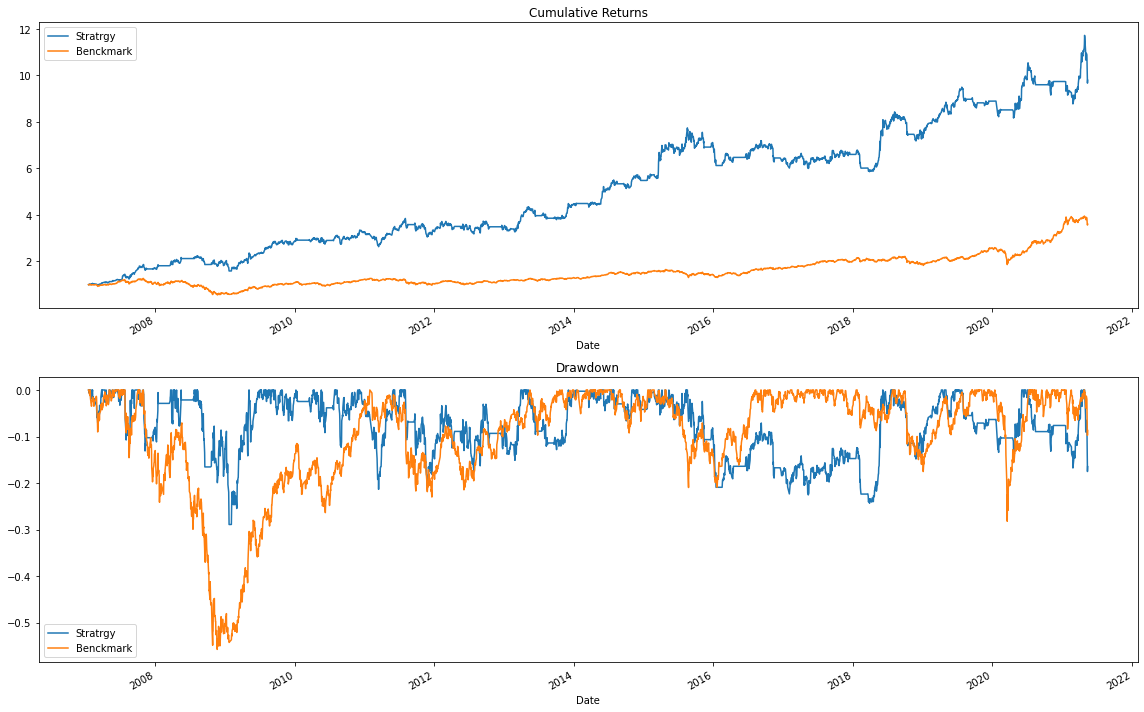

In [30]:
# Plotting results
fig, ax = plt.subplots(2, 1)
retrun_series.plot(figsize = (16, 10), label = "Stratrgy", ax = ax[0]) # ax = ax[0]:上半部的區塊
benckmark.plot(label = "Benckmark", ax = ax[0])

dd.plot(figsize = (16, 10), label = "Stratrgy", ax = ax[1])
dd_benckmark.plot(label = "Benckmark", ax = ax[1])
ax[0].set_title("Cumulative Returns")
ax[1].set_title("Drawdown")
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

# 分析績效

In [31]:
def Performance(cumulative_returns):
    returns = cumulative_returns.pct_change().dropna() #日報酬
    total_return = cumulative_returns[-1] - 1          #總報酬(最後一個數字減1)
    total_days = (cumulative_returns.index[-1] - cumulative_returns.index[0]).days #index前面一個數值-最後一個數值
    annualized_return = (total_return + 1)**(365/total_days) - 1  #年化的報酬
    mean = returns.mean()
    std = returns.std()
    annualized_volatility = std*np.sqrt(260)  #日標準差*根號260 (260為交易天數)
    annualized_sharpe = mean/std*np.sqrt(260)  #日平均報酬/日標準差*根號260
    mdd = (cumulative_returns/cumulative_returns.cummax() - 1).min()  #最大交易回落 Max drawdown (MDD)
    
    return [total_return*100, annualized_return*100, annualized_volatility, annualized_sharpe, mdd*100]  # *100為百分比

In [32]:
p1 = Performance(retrun_series)
p2 = Performance(benckmark)

performance = pd.DataFrame([p1, p2])
performance.columns =  ["Total Return(%)", "Annualized Return(%)", "Annualized Volatility", "Sharpe Ratio", "MDD(%)"]
performance.index = ["Stratrgy", "Benckmark"]

In [33]:
performance

,Total Return(%),Annualized Return(%),Annualized Volatility,Sharpe Ratio,MDD(%)
Stratrgy,879.441964,17.255614,0.216268,0.916336,-28.912881
Benckmark,260.220354,9.352287,0.203979,0.567018,-55.752792


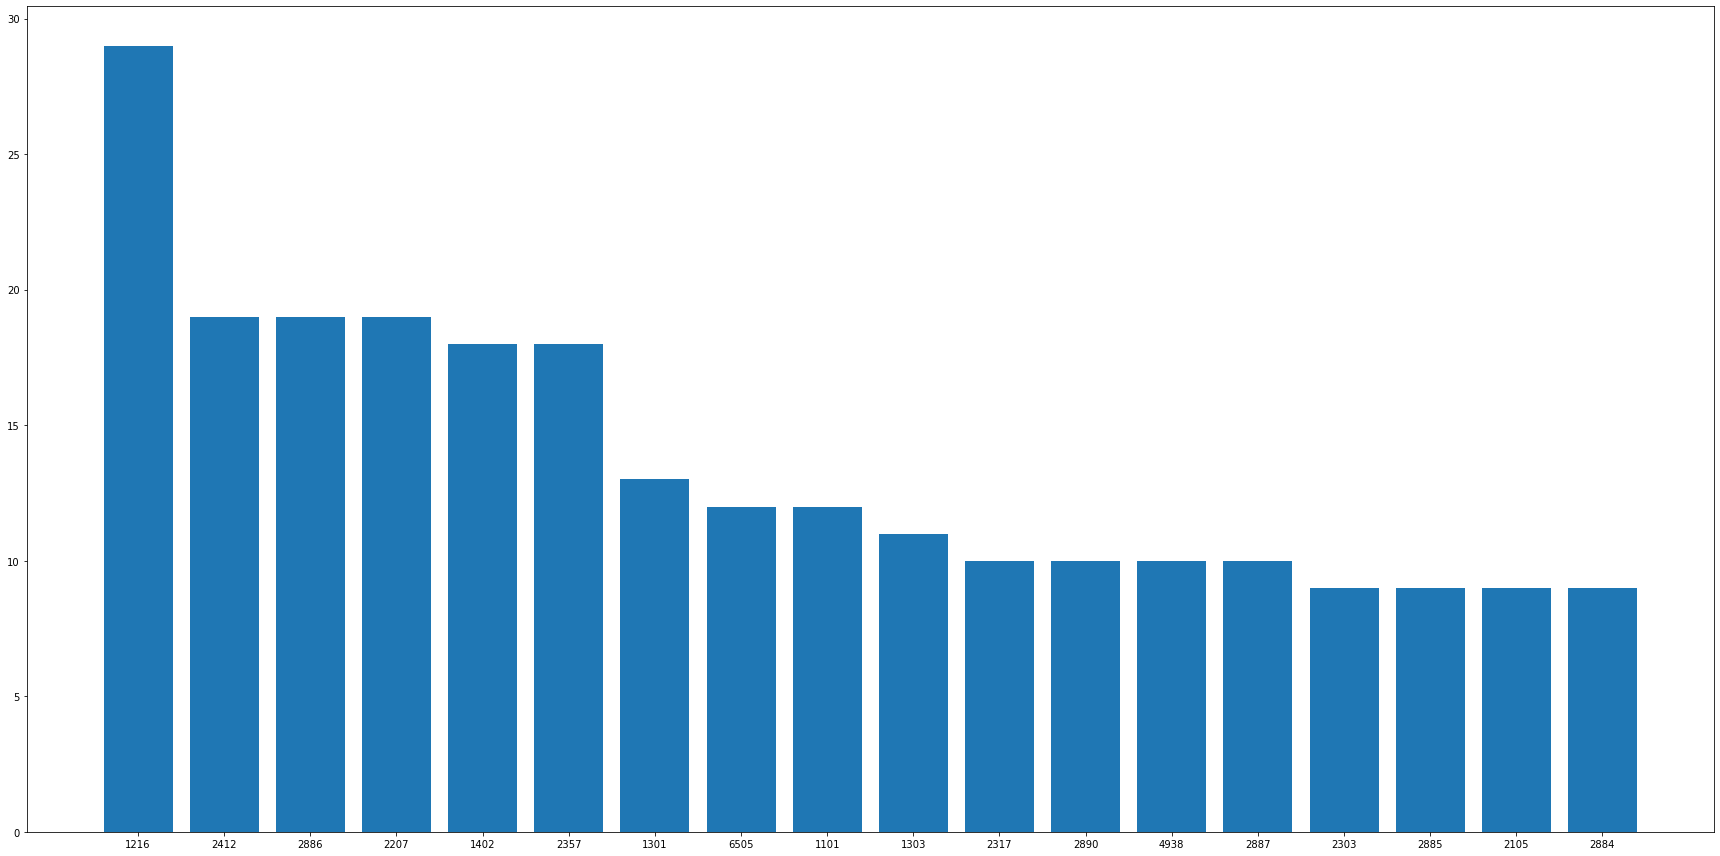

In [34]:
#要看我們的績效是不是都來自某一檔股票
names = list(tickers_record.keys())  #tickers_record.keys()取出股票代碼
values = list(tickers_record.values()) #.values代表它被選到了幾次

top = 0.3
num = int(len(names) * top)
plt.bar(range(num), values[:num], tick_label=names[:num])
plt.tight_layout()
plt.show()

In [35]:
#如果選不到1216統一企業的話，績效會不會還是不錯?
#回去把統一的收盤價drop掉後，再全部跑一次
收盤價 = 收盤價.drop(["1216"], axis=1)

#=> 沒有統一並沒有影響太多